# Import Dependencies

In [1]:
# Data Manipulation Libraries: Standard dataframes and array libraries
import pandas as pd
import numpy as np
# from datetime import datetime
from datetime import datetime, timedelta

# Data Visualization Libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Data analysis
 

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Displaying plots in jupter notebook
%matplotlib inline
# Displaying pandas columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Objectives

 - Calculate Portfolio weights
 - Calculate Portfolio returns

# Import data

In [2]:
# Import pd.read_csv()
portfolio_df = pd.read_csv("static/data/small_pf.csv")
returns_df =  pd.read_csv("static/data/factors_pf_returns.csv")

# Transform Data

In [3]:
portfolio_df['date'] = portfolio_df['date'].astype('datetime64[ns]')
returns_df['date'] = returns_df['date'].astype('datetime64[ns]')

### Calculate returns from pricing data

In [4]:
portofolio_time = portfolio_df['date'].max() - portfolio_df['date'].min()
portofolio_time

Timedelta('1180 days 00:00:00')

In [5]:
# Portfolio prices
portfolio_df.head(10)

,date,GE,JPM,MSFT,PG
0,2015-01-02,25.06,62.49,46.760,90.44
1,2015-01-05,24.60,60.55,46.325,90.01
2,2015-01-06,24.07,58.98,45.650,89.60
3,2015-01-07,24.08,59.07,46.230,90.07
4,2015-01-08,24.37,60.39,47.590,91.10
5,2015-01-09,24.03,59.34,47.190,90.25
6,2015-01-12,23.98,58.83,46.600,89.92
7,2015-01-13,23.86,58.84,46.355,90.30
8,2015-01-14,23.78,56.81,45.955,89.99
9,2015-01-15,23.58,54.99,45.480,89.86


In [6]:
# Make date column index and then use the pct_change() on dataframe
pf_returns = portfolio_df.set_index('date').pct_change()

In [15]:
pf_returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436


In [16]:
# Weights
weights = np.array([.5, .2, .2, .1])

In [17]:
# Calcualte average return for each stock
# This will 
meanDailyReturns = pf_returns.mean()
meanDailyReturns

GE     -0.000675
JPM     0.000769
MSFT    0.000907
PG     -0.000144
dtype: float64

In [10]:
# Calculate the portfolio return
pf_return = np.sum(meanDailyReturns*weights)
pf_return

0.0006721870091821165

# Calculate cumulative returns

In [18]:
# Calculate daily portfolio returns
pf_returns['Portfolio']= pf_returns.dot(weights)

In [19]:
# Calculate cumulative returns
daily_cum_ret=(1+pf_returns).cumprod()
print (daily_cum_ret.tail())

                  GE       JPM      MSFT        PG  Portfolio
date                                                         
2018-03-21  0.553871  1.836134  1.977759  0.851835   0.974287
2018-03-22  0.532721  1.759482  1.920231  0.844870   0.941086
2018-03-23  0.521548  1.712434  1.864414  0.839341   0.920097
2018-03-26  0.514366  1.765242  2.005560  0.844870   0.933974
2018-03-27  0.536313  1.730997  1.913388  0.860128   0.943378


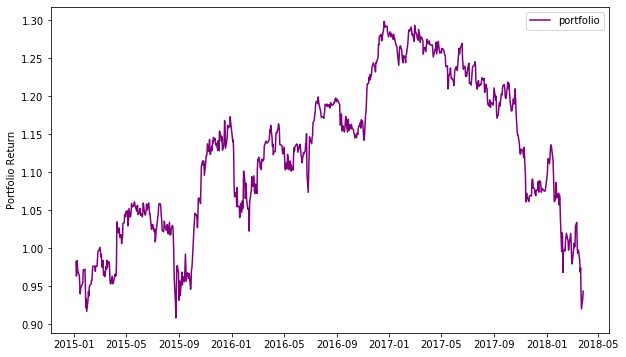

In [39]:
# Plot the portfolio cumulative returns only
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.set_ylabel('Portfolio Return')
plt.legend()
plt.show()